In [2]:
import pandas as pd
import openpyxl 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_excel('Dataset.xlsx')

Initial Inspection i.e Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           486 non-null    datetime64[ns]
 1   Description    486 non-null    object        
 2   Debit          465 non-null    float64       
 3   Credit         21 non-null     float64       
 4   Sub-category   486 non-null    object        
 5   Category       486 non-null    object        
 6   Category Type  486 non-null    object        
 7   Month Number   486 non-null    int64         
 8   Weekday        486 non-null    datetime64[ns]
 9   Amount         486 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 38.1+ KB


In [5]:
data.columns

Index(['Date', 'Description', 'Debit', 'Credit', 'Sub-category', 'Category',
       'Category Type', 'Month Number', 'Weekday', 'Amount'],
      dtype='object')

In [6]:
data.describe()

,Date,Debit,Credit,Month Number,Weekday,Amount
count,486,465.000000,21.000000,486.000000,486,486.000000
mean,2021-06-02 14:54:48.888888832,64.926882,3116.190476,5.534979,1900-01-03 23:21:28.888888832,72.528807
min,2021-01-04 00:00:00,5.000000,100.000000,1.000000,1900-01-01 00:00:00,-900.000000
25%,2021-03-17 00:00:00,5.000000,800.000000,3.000000,1900-01-02 00:00:00,-63.825000
50%,2021-06-02 00:00:00,15.000000,4500.000000,6.000000,1900-01-04 00:00:00,-5.000000
75%,2021-08-17 18:00:00,68.800000,5000.000000,8.000000,1900-01-06 00:00:00,-5.000000
max,2021-10-31 00:00:00,900.000000,5000.000000,10.000000,1900-01-07 00:00:00,5000.000000
std,NaN,136.654535,2184.056950,2.864250,NaN,796.117110


In [7]:
data.head()

,Date,Description,Debit,Credit,Sub-category,Category,Category Type,Month Number,Weekday,Amount
0,2021-01-04,Data With Decision,NaN,5000.0,Data with Decision,Salary,Income,1,1900-01-02,5000.0
1,2021-01-04,Drink,5.0,NaN,Coffee,Dining Out,Expense,1,1900-01-02,-5.0
2,2021-01-05,Estate Mangement,900.0,NaN,Rent,Living Expenses,Expense,1,1900-01-03,-900.0
3,2021-01-05,Financail upgrade,150.0,NaN,Cash loan,Transport,Expense,1,1900-01-03,-150.0
4,2021-01-05,Drink,5.0,NaN,Coffee,Dining Out,Expense,1,1900-01-03,-5.0


In [8]:
data.tail()

,Date,Description,Debit,Credit,Sub-category,Category,Category Type,Month Number,Weekday,Amount
481,2021-10-30,Trainers,133.8,NaN,Clothes,Discretionary,Expense,10,1900-01-07,-133.8
482,2021-10-30,Hangingout/Ticket,184.4,NaN,Entertainment,Discretionary,Expense,10,1900-01-07,-184.4
483,2021-10-31,Fashionistas,154.5,NaN,Clothes,Discretionary,Expense,10,1900-01-01,-154.5
484,2021-10-31,Uba,32.1,NaN,Taxi,Transport,Expense,10,1900-01-01,-32.1
485,2021-10-31,Foodary,15.0,NaN,Restaurant,Dining Out,Expense,10,1900-01-01,-15.0


Data Cleaning

In [9]:
print(data.isnull().any())
print(data.isnull().sum())


Date             False
Description      False
Debit             True
Credit            True
Sub-category     False
Category         False
Category Type    False
Month Number     False
Weekday          False
Amount           False
dtype: bool
Date               0
Description        0
Debit             21
Credit           465
Sub-category       0
Category           0
Category Type      0
Month Number       0
Weekday            0
Amount             0
dtype: int64


These nulls are not actual "missing" data — they are intentional.
This is a normal structure in many financial datasets. 
It just shows the type of transaction:

Expense ->shows only in Debit

Income -> shows only in Credit

In [10]:
data.duplicated().sum()

np.int64(4)

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

np.int64(0)

Extracting weekdays from date column for grouping and analyzing trends over time (e.g. which weekdays have the most spending).

In [13]:
data['WeekDay_Name']=data['Date'].dt.day_name()

In [14]:
data['Month_Name']=data['Date'].dt.month_name().sort_index()

In [15]:
data.columns

Index(['Date', 'Description', 'Debit', 'Credit', 'Sub-category', 'Category',
       'Category Type', 'Month Number', 'Weekday', 'Amount', 'WeekDay_Name',
       'Month_Name'],
      dtype='object')

Performing Key Analysis

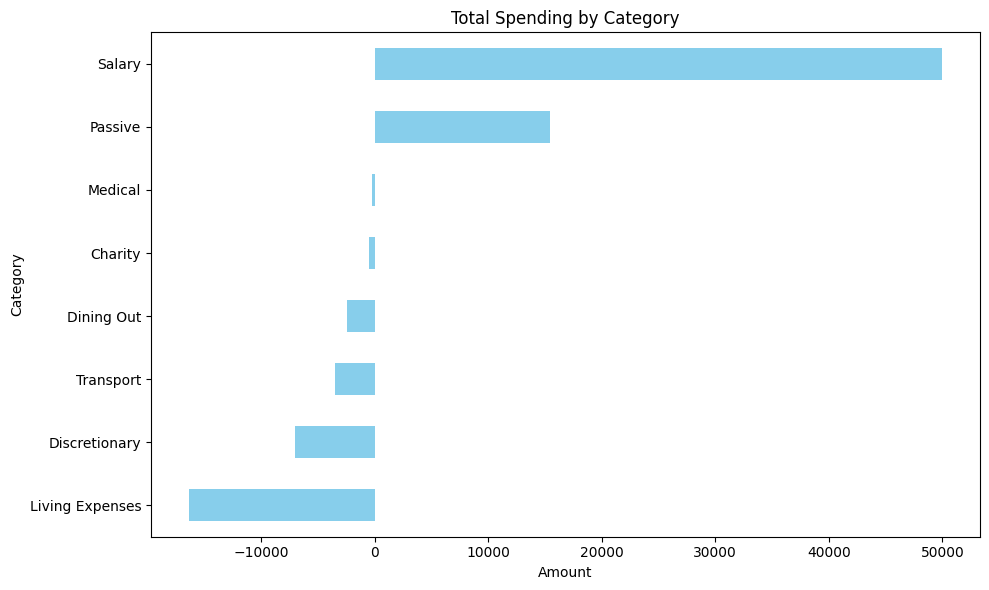

In [16]:

category_spending = data.groupby('Category')['Amount'].sum().sort_values()
category_spending.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Total Spending by Category')
plt.xlabel('Amount')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


1.Overall Income Vs Expenses

In [17]:
# Total Expenses = sum of all debit values.
data['Debit'].sum()

np.float64(30171.0)

In [18]:
# Total Income = sum of all credit values.
data['Credit'].sum()

np.float64(65440.0)

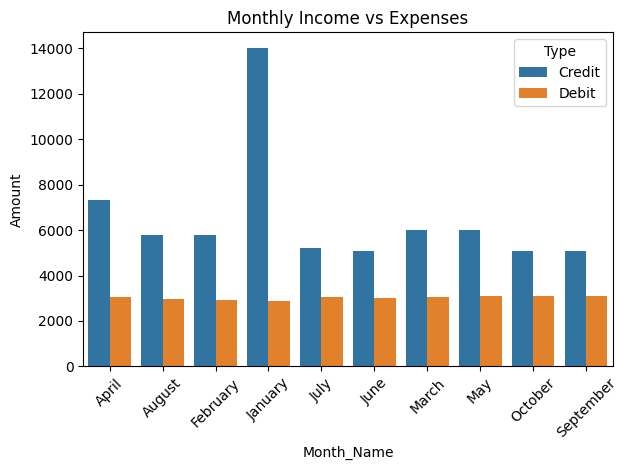

In [19]:

monthly = data.groupby('Month_Name')[['Credit', 'Debit']].sum().reset_index()
monthly_melted = monthly.melt(id_vars='Month_Name', var_name='Type', value_name='Amount')

sns.barplot(data=monthly_melted, x='Month_Name', y='Amount', hue='Type')
plt.title('Monthly Income vs Expenses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2.Monthly Trends

In [20]:
data.groupby('Month_Name')[['Credit', 'Debit', 'Amount']].sum()


,Credit,Debit,Amount
Month_Name,,,
April,7340.0,3038.0,4302.0
August,5800.0,2947.1,2852.9
February,5800.0,2904.6,2895.4
January,14000.0,2874.0,11126.0
July,5200.0,3065.0,2135.0
June,5100.0,3000.7,2099.3
March,6000.0,3049.7,2950.3
May,6000.0,3116.1,2883.9
October,5100.0,3093.7,2006.3


3.Category-wise Spending

In [21]:
data.groupby('Category')['Amount'].sum()

Category
Charity             -550.0
Dining Out         -2453.9
Discretionary      -7027.6
Living Expenses   -16399.8
Medical             -225.0
Passive            15440.0
Salary             50000.0
Transport          -3514.7
Name: Amount, dtype: float64

In [22]:
data.groupby('Sub-category')['Amount'].sum()

Sub-category
Cash loan             -1500.0
Clothes               -4303.6
Coffee                -1172.0
Data with Decision    50000.0
Doctor                 -225.0
Donation               -550.0
Entertainment         -1812.6
Fueling               -1412.5
Furnishings            -416.4
Gas/Electrics          -545.7
Gifts                  -495.0
Groceries             -6454.1
Phone                  -400.0
Rent                  -9000.0
Restaurant            -1281.9
Taxi                   -602.2
Teachable              4500.0
YouTube               10940.0
Name: Amount, dtype: float64

4.Spending by Weekday

In [23]:
data.groupby('WeekDay_Name')['Amount'].sum()

WeekDay_Name
Friday          49.2
Monday       26697.0
Saturday     -3241.0
Sunday        2325.4
Thursday      8191.8
Tuesday       4705.9
Wednesday    -3459.3
Name: Amount, dtype: float64

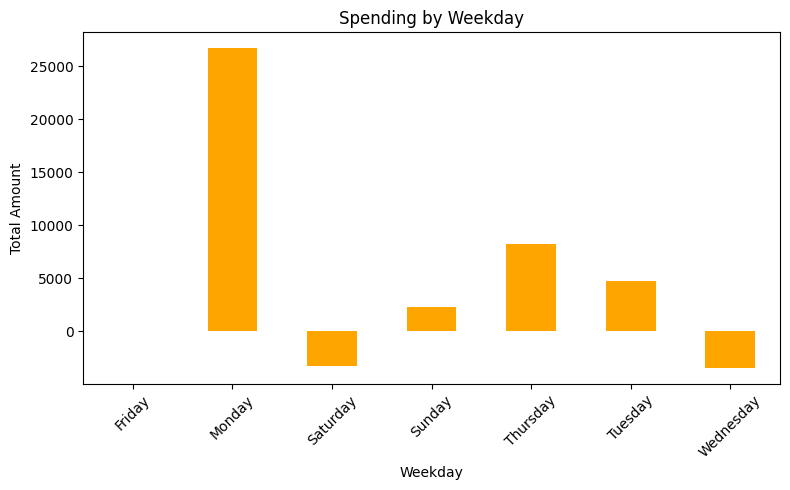

In [24]:
weekday_spending = data.groupby('WeekDay_Name')['Amount'].sum()

weekday_spending.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Spending by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


5.Essential vs Non-Essential

In [25]:
# Define essential categories
essential_categories = [
    'Living Expenses', 'Transport', 'Medical', 'Groceries', 'Utilities'
]

# Create a new column based on the Category
data['Category_Type'] = data['Category'].apply(
    lambda x: 'Essential' if x in essential_categories else 'Non-Essential'
)


In [26]:
data['Category_Type'].unique()

array(['Non-Essential', 'Essential'], dtype=object)

In [27]:
data['Category_Type'].value_counts()

Category_Type
Non-Essential    360
Essential        122
Name: count, dtype: int64

6.Top Expenses

In [36]:
top_expense = data[data['Amount'] < 0].groupby('Category')['Amount'].sum().abs().nlargest(5).reset_index()
print(top_expense)


          Category   Amount
0  Living Expenses  16399.8
1    Discretionary   7027.6
2        Transport   3514.7
3       Dining Out   2453.9
4          Charity    550.0


In [29]:
# Count how often each description appears (for recurring purchases)
frequent_spending = expenses['Description'].value_counts().head(10)
print(frequent_spending)


Description
Drink                219
Green's               40
Fuel                  20
Fashionistas          20
Uba                   20
Power source          10
Financail upgrade     10
Cinemas               10
Estate Mangement      10
Burger                10
Name: count, dtype: int64


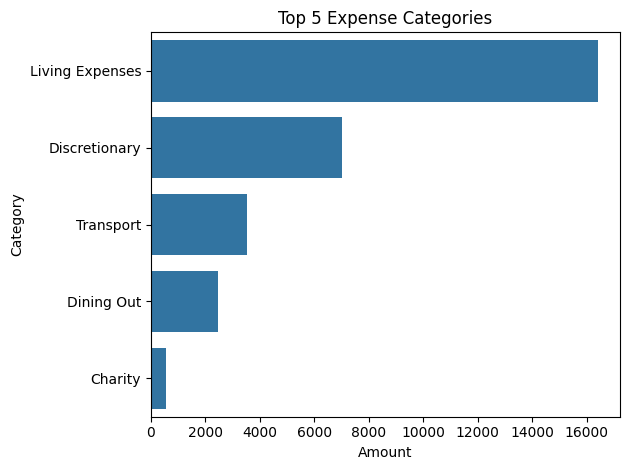

In [30]:
top_expense = data[data['Amount'] < 0].groupby('Category')['Amount'].sum().abs().nlargest(5).reset_index()

sns.barplot(data=top_expense, x='Amount', y='Category')
plt.title('Top 5 Expense Categories')
plt.tight_layout()
plt.show()


In [31]:

data.to_csv('Dataset_cleaned.csv', index=False)